
# **Predicción de Precios de Apartamentos en Bogotá**

**1. Introducción**

El mercado inmobiliario de Bogotá es un sector complejo y dinámico, donde múltiples factores influyen en el valor de los inmuebles. Este proyecto tiene como objetivo desarrollar un modelo de Machine Learning que permita predecir el precio de venta de apartamentos en la ciudad, basándose en una variedad de características estructurales, geográficas y socioeconómicas. A través de la exploración y análisis de datos, se busca identificar patrones que ayuden a estimar de manera precisa el valor de las propiedades, brindando así una herramienta útil tanto para compradores como para vendedores y agentes inmobiliarios.

**2. Fuente de Datos**

Para la construcción del modelo, se utilizaron datos recolectados mediante scraping de la plataforma Metrocuadrado, una de las principales fuentes de información sobre bienes raíces en Colombia. El dataset obtenido contiene información detallada sobre cada propiedad, incluyendo su ubicación (latitud y longitud), área en metros cuadrados, número de habitaciones y baños, antigüedad del inmueble, estrato socioeconómico, precio de venta y arriendo, costos de administración, entre otros. La riqueza y variedad de estas variables permiten analizar diferentes factores que afectan el precio de los apartamentos en la ciudad.

**3. Variables Relevantes para la Predicción**

Para garantizar la precisión del modelo, se han seleccionado las siguientes variables clave, las cuales presentan una fuerte relación con el precio de venta de los apartamentos:

Factores Claves:

Área (m²): En general, existe una relación directa entre el tamaño del apartamento y su precio de venta. A mayor área, mayor valor.

Ubicación (Latitud, Longitud, Sector): La localización es uno de los factores más determinantes en el precio de los inmuebles. Apartamentos en sectores de alta demanda suelen tener costos significativamente más elevados.

Estrato: Define el perfil socioeconómico de la zona y afecta el costo de vida, lo que influye en el valor de las propiedades.

Número de habitaciones y baños: La cantidad de espacios funcionales dentro del apartamento impacta su comodidad y, por lo tanto, su valor en el mercado.

Parqueaderos: Los apartamentos con parqueadero suelen ser más valorados, especialmente en zonas de alta congestión vehicular.

Antigüedad: Los apartamentos más nuevos suelen tener precios más altos debido a su estado de conservación y modernidad.

Administración: Un costo elevado de administración puede reflejar la presencia de amenidades y servicios adicionales en el edificio, lo cual influye en el precio.

Estado del inmueble (usado/nuevo): Los apartamentos nuevos suelen tener un costo más alto en comparación con los usados, debido a su menor desgaste y mayor atractivo.


**4. Enfoque Metodológico**

Para llevar a cabo este proyecto, se ha seguido un flujo de trabajo estructurado en diferentes etapas, asegurando la limpieza, transformación y análisis de los datos para la construcción del modelo predictivo:

Preprocesamiento de Datos: Se realiza una limpieza exhaustiva del dataset, eliminando valores atípicos, datos faltantes y transformando variables categóricas en numéricas para su procesamiento.

Análisis Exploratorio (EDA): Se emplean técnicas de visualización y análisis estadístico para identificar patrones en los datos, correlaciones entre variables y posibles anomalías.

Feature Engineering: Se seleccionan y crean nuevas variables que pueden mejorar la capacidad predictiva del modelo, como la conversión de datos de antigüedad y la categorización de precios en rangos.

Entrenamiento del Modelo: Se prueban diferentes algoritmos de regresión, como Regresión Lineal, Random Forest y Gradient Boosting, para determinar cuál ofrece el mejor desempeño en la predicción de precios.

Evaluación del Modelo: Se utilizan métricas como el Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R^2) para medir la precisión del modelo y su capacidad para generalizar a nuevos datos.

Implementación y Pruebas: Una vez validado el modelo, se realizan pruebas con datos reales para evaluar su efectividad en situaciones del mundo real.

**5. Referencias**

Para el desarrollo de este proyecto, se han consultado diversos repositorios y fuentes de información relacionadas con la predicción de precios inmobiliarios, entre ellos:

Builker-col/bogota-apartments: Repositorio de código y análisis de datos sobre el mercado inmobiliario en Bogotá.

Kaggle - House Price Prediction: Proyectos similares de predicción de precios de inmuebles en otras ciudades y países.

Este proyecto busca ofrecer un modelo de estimación de precios que pueda ser útil para quienes desean comprar o vender apartamentos en Bogotá, optimizando la toma de decisiones en el sector inmobiliario a través de técnicas de Machine Learning.



# ***1.Importación de Librerías y Carga de Datos***



📌 Importar las librerías

Objetivo: Cargar las herramientas necesarias para la limpieza, análisis, visualización y modelado de datos en el proyecto de predicción de precios de apartamentos.

Este bloque de código importa bibliotecas esenciales para manipular datos (pandas, numpy), visualizarlos (seaborn, matplotlib), procesarlos (sklearn.preprocessing), manejar valores faltantes (KNNImputer), aplicar modelos de aprendizaje automático basados en k-Nearest Neighbors (KNeighborsRegressor, KNeighborsClassifier) y evaluar el rendimiento del modelo (sklearn.metrics).

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPRegressor

📌 Carga del conjunto de datos: Leer el archivo CSV que contiene la información de los apartamentos y almacenarlo en un DataFrame de pandas.

In [58]:
ds_aptos = pd.read_csv('data/builker_raw_data.csv')
ds_aptos

<ipython-input-58-3c11052939c1>:1: DtypeWarning: Columns (7,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_aptos = pd.read_csv('data/builker_raw_data.csv')


,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,estado,longitud,latitud,datetime
0,374-M2718950,APARTAMENTO,VENTA Y ARRIENDO,2.500000e+09,320.0,4.0,5.0,2500000,3.0,COUNTRY,6.0,MAS DE 20 ANOS,USADO,-74.026855,4.7154746,{'$date': '2023-06-19T05:43:49.763Z'}
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,84.0,3.0,3.0,680000,1.0,SANTA BARBARA,6.0,MAS DE 20 ANOS,USADO,-74.0459,4.6944995,{'$date': '2023-06-19T05:43:53.411Z'}
2,10312-M2873283,APARTAMENTO,VENTA Y ARRIENDO,1.980000e+09,248.0,3.0,3.0,2200000,3.0,SANTA BARBARA,6.0,MAS DE 20 ANOS,USADO,-74.027916,4.6908536,{'$date': '2023-06-19T05:43:58.765Z'}
3,10139-M4343016,APARTAMENTO,VENTA,4.950000e+08,77.2,3.0,2.0,367000,1.0,COLINA Y ALREDEDORES,4.0,ENTRE 5 Y 10 ANOS,USADO,-74.0564,4.7423816,{'$date': '2023-06-19T05:44:02.598Z'}
4,10139-M3692828,APARTAMENTO,VENTA,1.570000e+09,213.0,3.0,4.0,994000,3.0,COUNTRY,3.0,ENTRE 5 Y 10 ANOS,USADO,-74.028244,4.708852,{'$date': '2023-06-19T05:44:06.286Z'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68968,3858-M4625362,APARTAMENTO,VENTA,1.500000e+09,180.0,3.0,4.0,1300000.0,3.0,SANTA BARBARA,5.0,MAS DE 20 ANOS,USADO,-74.04406,4.701624,{'$date': '2023-10-15T02:46:15.929Z'}
68969,2361-M4625079,APARTAMENTO,VENTA,3.500000e+08,82.0,3.0,2.0,300000.0,1.0,CEDRITOS,4.0,MAS DE 20 ANOS,USADO,-74.038,4.724,{'$date': '2023-10-15T02:48:23.580Z'}
68970,11013-M4575253,APARTAMENTO,VENTA,5.000000e+08,76.0,3.0,2.0,785000.0,2.0,CHAPINERO ALTO,5.0,MAS DE 20 ANOS,USADO,-74.053,4.649,{'$date': '2023-10-15T02:48:28.767Z'}
68971,12500-M4623759,APARTAMENTO,VENTA,2.200000e+08,44.0,2.0,2.0,130500.0,0.0,NaN,4.0,ENTRE 10 Y 20 ANOS,USADO,-74.125,4.635,{'$date': '2023-10-15T02:48:40.328Z'}


📌 Definición de rangos de área para clasificar propiedades
Se establecen rangos de área en metros cuadrados (m²) con el fin de categorizar las propiedades en grupos específicos. Esto permite analizar la distribución de los apartamentos según su tamaño y facilita la comparación entre diferentes categorías de inmuebles.

,count
area_range,
50-100,28302
150-300,15347
100-150,12669
0-50,8863
300-600,3644
600-1000,91
1000+,50


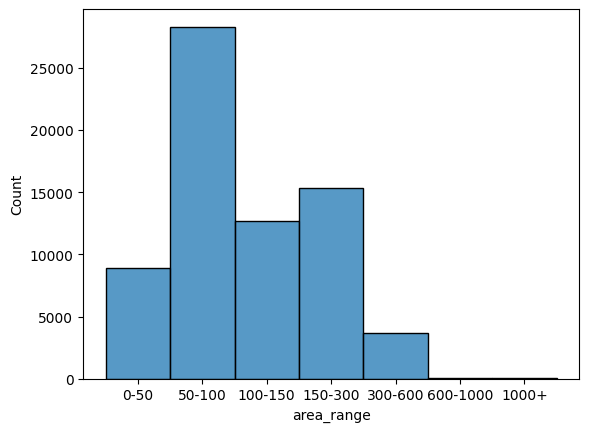

In [59]:
# Propiedades agrupadas por rangos de área
area_ranges = [0, 50, 100, 150, 300, 600, 1000,50000]
area_labels = ["0-50", "50-100", "100-150", "150-300", "300-600", "600-1000", "1000+"]
area_ranges_df = ds_aptos.copy()
area_ranges_df['area_range'] = pd.cut(ds_aptos['area'], bins=area_ranges, labels=area_labels, right=False)
sns.histplot(data = area_ranges_df, x = "area_range")
# Contar las instancias por rangos de área
area_ranges_df['area_range'].value_counts()

# **2. Limpieza y Preprocesamiento de Datos**

📌 Exploración de la estructura de los datos: Obtener un resumen general del conjunto de datos para analizar su tamaño, tipos de datos y valores faltantes.

In [60]:
print(ds_aptos.shape) # Revisar forma de los datos (ej. rows & columns)
print(ds_aptos.info())

(68973, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68973 entries, 0 to 68972
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          68973 non-null  object 
 1   tipo_propiedad  68973 non-null  object 
 2   tipo_operacion  68973 non-null  object 
 3   precio_venta    48138 non-null  float64
 4   area            68971 non-null  float64
 5   habitaciones    68965 non-null  float64
 6   banos           68967 non-null  float64
 7   administracion  58679 non-null  object 
 8   parqueaderos    68965 non-null  float64
 9   sector          63998 non-null  object 
 10  estrato         68953 non-null  float64
 11  antiguedad      68945 non-null  object 
 12  estado          67692 non-null  object 
 13  longitud        68164 non-null  object 
 14  latitud         68164 non-null  object 
 15  datetime        68973 non-null  object 
dtypes: float64(6), object(10)
memory usage: 8.4+ MB
None


Hay 68,973 registros y 16 columnas.
Algunas columnas tienen valores faltantes (por ejemplo, precio_venta, administracion, sector, longitud, latitud).
Se mezclan tipos de datos float64 (numéricos), object (cadenas de texto) y datetime (fechas).

📌 Resumen estadístico de los datos: Obtener estadísticas descriptivas de las variables numéricas del conjunto de datos.


In [61]:
#Datos estadísticos
ds_aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,48138.0,1.509352e+09,3.697549e+10,245000.0,365000000.0,600000000.0,1.150000e+09,4.250000e+12
area,68971.0,1.351401e+02,9.065257e+02,0.0,61.0,92.0,1.590000e+02,1.420000e+05
habitaciones,68965.0,2.587602e+00,8.490058e-01,1.0,2.0,3.0,3.000000e+00,8.000000e+00
banos,68967.0,2.610234e+00,1.158731e+00,-3.0,2.0,2.0,3.000000e+00,5.000000e+00
parqueaderos,68965.0,1.572203e+00,1.048859e+00,0.0,1.0,2.0,2.000000e+00,4.000000e+00
estrato,68953.0,4.740954e+00,1.262316e+00,0.0,4.0,5.0,6.000000e+00,7.000000e+00


Hallazgos clave:

precio_venta:
La media es 1.5 mil millones, pero la desviación estándar es extremadamente alta (3.7x10¹⁰), lo que sugiere valores atípicos.
El valor máximo (4.25 billones) parece anómalo.

area:
El promedio es 135 m², pero hay un valor mínimo de 0 m², lo que indica posibles errores en los datos.
El máximo (142,000 m²) es inusualmente grande y debe verificarse.

habitaciones:
La mayoría de los apartamentos tienen 2 o 3 habitaciones.
El máximo es 8 habitaciones

baños:
Hay un valor mínimo de -3, lo que sugiere datos incorrectos que necesitan limpieza.

parqueaderos:
La mayoría tiene entre 1 y 2 parqueaderos, lo que es consistente con la oferta del mercado.

estrato:
El promedio es 4.74, con un rango de 0 a 7.
Un estrato de 0 podría ser incorrecto, ya que generalmente los estratos van de 1 a 6.

📌 Identificación de valores nulos: Detectar la cantidad de valores faltantes en cada columna del conjunto de datos.

In [62]:
#Identificar si hay nulos y duplicados
nulos = ds_aptos.isnull().sum()
print(nulos)

codigo                0
tipo_propiedad        0
tipo_operacion        0
precio_venta      20835
area                  2
habitaciones          8
banos                 6
administracion    10294
parqueaderos          8
sector             4975
estrato              20
antiguedad           28
estado             1281
longitud            809
latitud             809
datetime              0
dtype: int64


Hallazgos clave:

precio_venta → 🚨 20,835 valores nulos (~30% de los datos).
Es una variable clave para la predicción, por lo que es necesario decidir si se imputan valores o se eliminan registros.

administracion → ❗ 10,294 valores nulos.
Se debe analizar si estos valores faltantes pueden estimarse con otras variables relacionadas.

sector → ❗ 4,975 valores nulos.
Puede ser importante para análisis de ubicación y segmentación de precios.

longitud y latitud → ❗ 809 valores nulos.
Puede afectar análisis geoespaciales. Se pueden eliminar o imputar si es posible.

estado → ⚠️ 1,281 valores nulos.
Verificar si se pueden completar con datos similares o marcar como "desconocido".
Otras variables (area, habitaciones, baños, parqueaderos, estrato, antiguedad) tienen pocos valores nulos (<50), por lo que se pueden manejar con imputación o eliminación de registros específicos.

📌 Detección de registros duplicados: Identificar si existen códigos repetidos en la columna codigo, lo que podría indicar registros duplicados en el conjunto de datos.

In [63]:
# Verificar duplicados en la columna "codigo"
duplicados = ds_aptos["codigo"].duplicated(keep=False)  # Muestra todos los duplicados
print(duplicados)

0        False
1        False
2        False
3        False
4        False
         ...  
68968    False
68969    False
68970    False
68971    False
68972    False
Name: codigo, Length: 68973, dtype: bool


📌 Filtrado y visualización de valores duplicados: Extraer y mostrar los registros con códigos duplicados para evaluar su impacto en el dataset.

In [64]:
# Filtrar y mostrar los valores duplicados
df_duplicados = ds_aptos[duplicados]

# Imprimir los duplicados encontrados
if not df_duplicados.empty:
    print("Valores duplicados encontrados:")
    print(df_duplicados)
else:
    print("No hay valores duplicados en la columna 'codigo'.")

No hay valores duplicados en la columna 'codigo'.


📌 Filtrar datos eliminando registros de arriendo: Remover los registros cuyo tipo_operacion sea "ARRIENDO", ya que el modelo está diseñado para analizar precios de venta y no de alquiler.

In [65]:
# Explicación: Aquí se describe lo que hace este bloque de código
# Eliminar los arriendos de tipo_operacion porque no son propios para el modelo

print(ds_aptos['tipo_operacion'].unique())
print(ds_aptos['tipo_operacion'].value_counts().isnull())
# Eliminar filas donde 'codigo' sea 'ARRIENDO'
df_filtrado = ds_aptos[ds_aptos["tipo_operacion"] != "ARRIENDO"]
print(df_filtrado['tipo_operacion'].unique())
print(df_filtrado.isnull().sum())

['VENTA Y ARRIENDO' 'VENTA' 'ARRIENDO']
tipo_operacion
VENTA               False
ARRIENDO            False
VENTA Y ARRIENDO    False
Name: count, dtype: bool
['VENTA Y ARRIENDO' 'VENTA']
codigo               0
tipo_propiedad       0
tipo_operacion       0
precio_venta         0
area                 1
habitaciones         2
banos                2
administracion    4026
parqueaderos         4
sector            3306
estrato             17
antiguedad          25
estado            1281
longitud           718
latitud            718
datetime             0
dtype: int64


📌 Eliminar feature irrelevantes

Eliminar las columnas "codigo", "estado", "tipo_propiedad", "tipo_operacion" y "datetime" del DataFrame porque no aportan información útil para el análisis y modelado de datos.

Se eliminan estas columnas porque:

codigo: Es un identificador único asignado por el sistema y no tiene relación con las características de los apartamentos, por lo que no aporta valor al modelo. estado: Todos los registros están en la categoría "USADO" o tienen valores vacíos, por lo que no añade información útil al análisis. tipo_operacion: Ya se filtraron los datos para conservar solo las propiedades en venta, haciendo que esta columna sea redundante. datetime: Representa la fecha y hora del registro, pero no se utilizará en el modelo de predicción, por lo que se descarta. tipo de propiedad: solo existe un tipo de propiedad en el dataset, por lo que no añade valor a la informacion.

In [66]:
col_del = ["codigo", "estado", "tipo_operacion", "datetime", "tipo_propiedad"]
df_filtrado.drop(col_del, axis=1, inplace=True)
print(df_filtrado.columns)
print(df_filtrado.isnull().sum())

Index(['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'longitud',
       'latitud'],
      dtype='object')
precio_venta         0
area                 1
habitaciones         2
banos                2
administracion    4026
parqueaderos         4
sector            3306
estrato             17
antiguedad          25
longitud           718
latitud            718
dtype: int64


<ipython-input-66-ff90f00f2638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.drop(col_del, axis=1, inplace=True)


In [67]:
print(df_filtrado.columns)

Index(['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'longitud',
       'latitud'],
      dtype='object')


📌 Validación de valores nulos en la columna "estrato"

Identificar y analizar los registros donde la variable "estrato" tiene valores nulos o igual a cero, ya que podrían indicar datos faltantes o errores en la información.

In [68]:
missing_data = df_filtrado[df_filtrado["estrato"].isna()]
missing_data

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,longitud,latitud
19296,1.700000e+09,186.0,3.0,4.0,1320000,3.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.04772,4.6593714
19430,9.500000e+08,171.0,3.0,3.0,700000,1.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.089386,4.606289
19461,2.400000e+09,295.0,3.0,3.0,1250000,3.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.0778,4.5809317
19641,6.600000e+08,108.0,3.0,2.0,267000,2.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.0607,4.72281
19768,2.600000e+09,320.0,4.0,5.0,2248200,4.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.03002,4.6931415
23266,1.800000e+09,183.0,2.0,3.0,1200000,1.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.047295,4.662811
27823,1.450000e+09,0.0,3.0,4.0,1800000,3.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.0485,4.6740546
28740,2.200000e+09,288.0,3.0,3.0,1100000,4.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.079185,4.723232
29226,3.800000e+09,326.0,3.0,4.0,2800000,0.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.05096,4.6574187
30982,1.988000e+12,184.0,3.0,4.0,NaN,4.0,OTROS,NaN,ENTRE 5 Y 10 ANOS,-74.188675,4.616134


### ¿Qué nos muestra la tabla?
Existen varias propiedades con "estrato" faltante, lo que podría ser un error en la recolección de datos.
Muchas de estas propiedades están en el sector "OTROS", lo que puede indicar que la información del estrato no se registró correctamente en estos casos.
También hay valores nulos en la columna "administración", lo que puede sugerir que algunos datos faltantes están relacionados.

📌 Limpiar, transformar y mejorar la calidad del dataset antes del análisis o modelado.



In [69]:
def validar_coordenadas(df):
    # Convertir latitud y longitud a float
    df['longitud'] = pd.to_numeric(df['longitud'], errors='coerce')
    df['latitud'] = pd.to_numeric(df['latitud'], errors='coerce')
    # Filtrar coordenadas dentro de Bogotá
    registros_fuera_bogota = df[~(df['latitud'].between(4.5, 4.85)) | ~(df['longitud'].between(-74.2, -73.9))]
    df = df[(df['latitud'].between(4.5, 4.85)) & (df['longitud'].between(-74.2, -73.9))]
    return df, registros_fuera_bogota

def imputar_sector(df):
    sectores_conocidos = df.dropna(subset=['sector'])
    sectores_desconocidos = df[df['sector'].isnull()]

    if not sectores_desconocidos.empty:
        knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
        knn.fit(sectores_conocidos[['longitud', 'latitud']])

        distancias, indices = knn.kneighbors(sectores_desconocidos[['longitud', 'latitud']])

        sectores_imputados = []
        for idx, vecinos in enumerate(indices):
            sectores_vecinos = sectores_conocidos.iloc[vecinos]['sector'].mode()
            sectores_imputados.append(sectores_vecinos[0] if not sectores_vecinos.empty else np.nan)

        df.loc[df['sector'].isnull(), 'sector'] = sectores_imputados

    return df

#Limpieza de dataSet
df = df_filtrado.copy()

registros_eliminados = pd.DataFrame()

# Validar coordenadas antes de imputar sector
df, registros_fuera_bogota = validar_coordenadas(df)
registros_eliminados = pd.concat([registros_eliminados, registros_fuera_bogota])

# Imputar sector antes de eliminar registros sin sector
df = imputar_sector(df)

# Eliminar registros sin sector restantes
registros_eliminados = pd.concat([registros_eliminados, df[df['sector'].isnull()]])
df = df.dropna(subset=['sector'])

# Convertir administración a numérico
df['administracion'] = pd.to_numeric(df['administracion'], errors='coerce')

# Rellenar valores nulos en columnas clave con la mediana del sector
cols_to_impute = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato']
for col in cols_to_impute:
    df[col] = df.groupby('sector')[col].transform(lambda x: x.fillna(x.median()))

# Rellenar administración con la mediana del estrato
df['administracion'] = df.groupby('estrato')['administracion'].transform(lambda x: x.fillna(x.median()))

# Corregir estrato 7 a 6
df['estrato'] = df['estrato'].replace(7, 6)

# Imputar estrato 0 según sector y precio de venta
df.loc[df['estrato'] == 0, 'estrato'] = df.groupby('sector')['estrato'].transform(lambda x: x.median())

# Imputar valores nulos en 'antiguedad' usando la moda del sector
df['antiguedad'] = df.groupby('sector')['antiguedad'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Si quedan valores nulos, usar KNN para imputarlos
if df['antiguedad'].isnull().sum() > 0:
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
    df['antiguedad'] = knn_imputer.fit_transform(df[['precio_venta', 'longitud', 'latitud']])

df.info()
df[df.select_dtypes(include= "object").columns] = df.select_dtypes(include= "object").apply(lambda x: x.astype("category"))


<class 'pandas.core.frame.DataFrame'>
Index: 46003 entries, 0 to 68972
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio_venta    46003 non-null  float64
 1   area            46003 non-null  float64
 2   habitaciones    46003 non-null  float64
 3   banos           46003 non-null  float64
 4   administracion  46003 non-null  float64
 5   parqueaderos    46003 non-null  float64
 6   sector          46003 non-null  object 
 7   estrato         46003 non-null  float64
 8   antiguedad      46003 non-null  object 
 9   longitud        46003 non-null  float64
 10  latitud         46003 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.2+ MB


1️⃣ Validación y filtrado de coordenadas 🌍 ✔ Conversión de coordenadas: Se convierten las columnas latitud y longitud a valores numéricos para evitar errores. ✔ Filtrado geográfico:

Se conservan solo las propiedades ubicadas en Bogotá (latitud entre 4.5 y 4.85, longitud entre -74.2 y -73.9). Los registros fuera de Bogotá se almacenan en registros_fuera_bogota para un análisis posterior. 📌 ¿Por qué es importante? 👉 Garantiza que solo se analicen propiedades dentro del área objetivo, evitando errores en datos mal registrados.

2️⃣ Imputación del sector con KNN 🏘 ✔ Separación de registros:

Propiedades con sector conocido → Se usan como referencia. Propiedades sin sector → Se imputan usando K-Nearest Neighbors (KNN) en base a la ubicación (latitud, longitud). ✔ Proceso de imputación: Se encuentran las 5 propiedades más cercanas. Se asigna el sector más frecuente entre ellas (moda). 📌 ¿Por qué usar KNN? 👉 Permite estimar el sector de manera precisa sin eliminar datos valiosos.

3️⃣ Eliminación de registros sin sector 🗑 ✔ Luego de la imputación, si aún hay propiedades sin sector, se eliminan. ✔ Estos registros se almacenan en registros_eliminados para trazabilidad.

📌 ¿Por qué? 👉 Sin el sector, no se pueden completar correctamente otras variables clave como estrato, área o precio.

4️⃣ Transformaciones y correcciones 🔧 ✔ Conversión de administración a numérico para facilitar cálculos. ✔ Imputación de valores nulos con la mediana del sector en:

Área Habitaciones Baños Parqueaderos Estrato ✔ Imputación de administración con la mediana del estrato (ya que los costos administrativos dependen del nivel socioeconómico). ✔ Correcciones en la variable estrato:

Estrato 7 → Estrato 6 (en Bogotá los estratos van de 1 a 6). Estrato 0 → Se reemplaza por la mediana del sector. 📌 ¿Por qué usar la mediana? 👉 La mediana es menos sensible a valores extremos, asegurando estabilidad en los datos.

5️⃣ Imputación y transformación de antigüedad 🏗 ✔ Paso 1: Se asigna la moda del sector a los valores nulos. ✔ Paso 2: Si aún quedan valores nulos, se usa KNN Imputer con los datos de precio y ubicación.

📌 ¿Por qué esta estrategia? 👉 Asegura que todas las propiedades tengan un valor de antigüedad realista mediante un enfoque jerárquico.

6️⃣ Optimización del dataset 📊 ✔ Se convierten las variables categóricas a tipo categoría para mejorar la eficiencia en el almacenamiento y procesamiento. ✔ Se genera un resumen del dataset con df.info() para verificar la limpieza de los datos.

🎯 Resultado Final ✅ 🚀 Dataset optimizado, limpio y sin valores atípicos extremos. 🔍 Datos nulos imputados usando técnicas estadísticas y basadas en la ubicación. 📊 Preparado para análisis exploratorio y modelos de Machine Learning.

In [70]:
df['antiguedad'].unique()

['MAS DE 20 ANOS', 'ENTRE 5 Y 10 ANOS', 'ENTRE 0 Y 5 ANOS', 'ENTRE 10 Y 20 ANOS', 'REMODELADO']
Categories (5, object): ['ENTRE 0 Y 5 ANOS', 'ENTRE 10 Y 20 ANOS', 'ENTRE 5 Y 10 ANOS',
                         'MAS DE 20 ANOS', 'REMODELADO']

In [71]:
registros_eliminados

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,longitud,latitud
8,8.450000e+08,150.0,3.0,4.0,760000,2.0,NaN,6.0,REMODELADO,NaN,NaN
89,7.450000e+08,85.0,2.0,3.0,590000,2.0,NaN,6.0,ENTRE 0 Y 5 ANOS,NaN,NaN
105,1.265000e+09,139.0,4.0,5.0,659000,3.0,NaN,5.0,ENTRE 0 Y 5 ANOS,NaN,NaN
128,1.040000e+08,36.0,2.0,1.0,60500,0.0,BOSA SOACHA,2.0,ENTRE 10 Y 20 ANOS,-74.202934,4.627528
196,2.500000e+09,440.0,4.0,5.0,2400000,4.0,CERROS DE SUBA,6.0,MAS DE 20 ANOS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68821,1.599000e+08,140.0,3.0,2.0,100000.0,1.0,NaN,3.0,REMODELADO,-74.263030,4.731560
68868,4.200000e+08,74.0,2.0,2.0,530000.0,1.0,NaN,6.0,MAS DE 20 ANOS,NaN,NaN
68897,1.400000e+09,126.0,2.0,3.0,806000.0,2.0,NaN,6.0,ENTRE 5 Y 10 ANOS,NaN,NaN
68910,2.499000e+08,48.0,3.0,2.0,10000.0,1.0,NaN,3.0,REMODELADO,NaN,NaN


In [72]:
df.isnull().sum()

,0
precio_venta,0
area,0
habitaciones,0
banos,0
administracion,0
parqueaderos,0
sector,0
estrato,0
antiguedad,0
longitud,0


# **3. Análisis Exploratorio de Datos (EDA) y  Feature Engineering**

📌Explorar la distribución del precio de venta en cada estrato, identificando posibles valores atípicos y la relación entre área y precio.

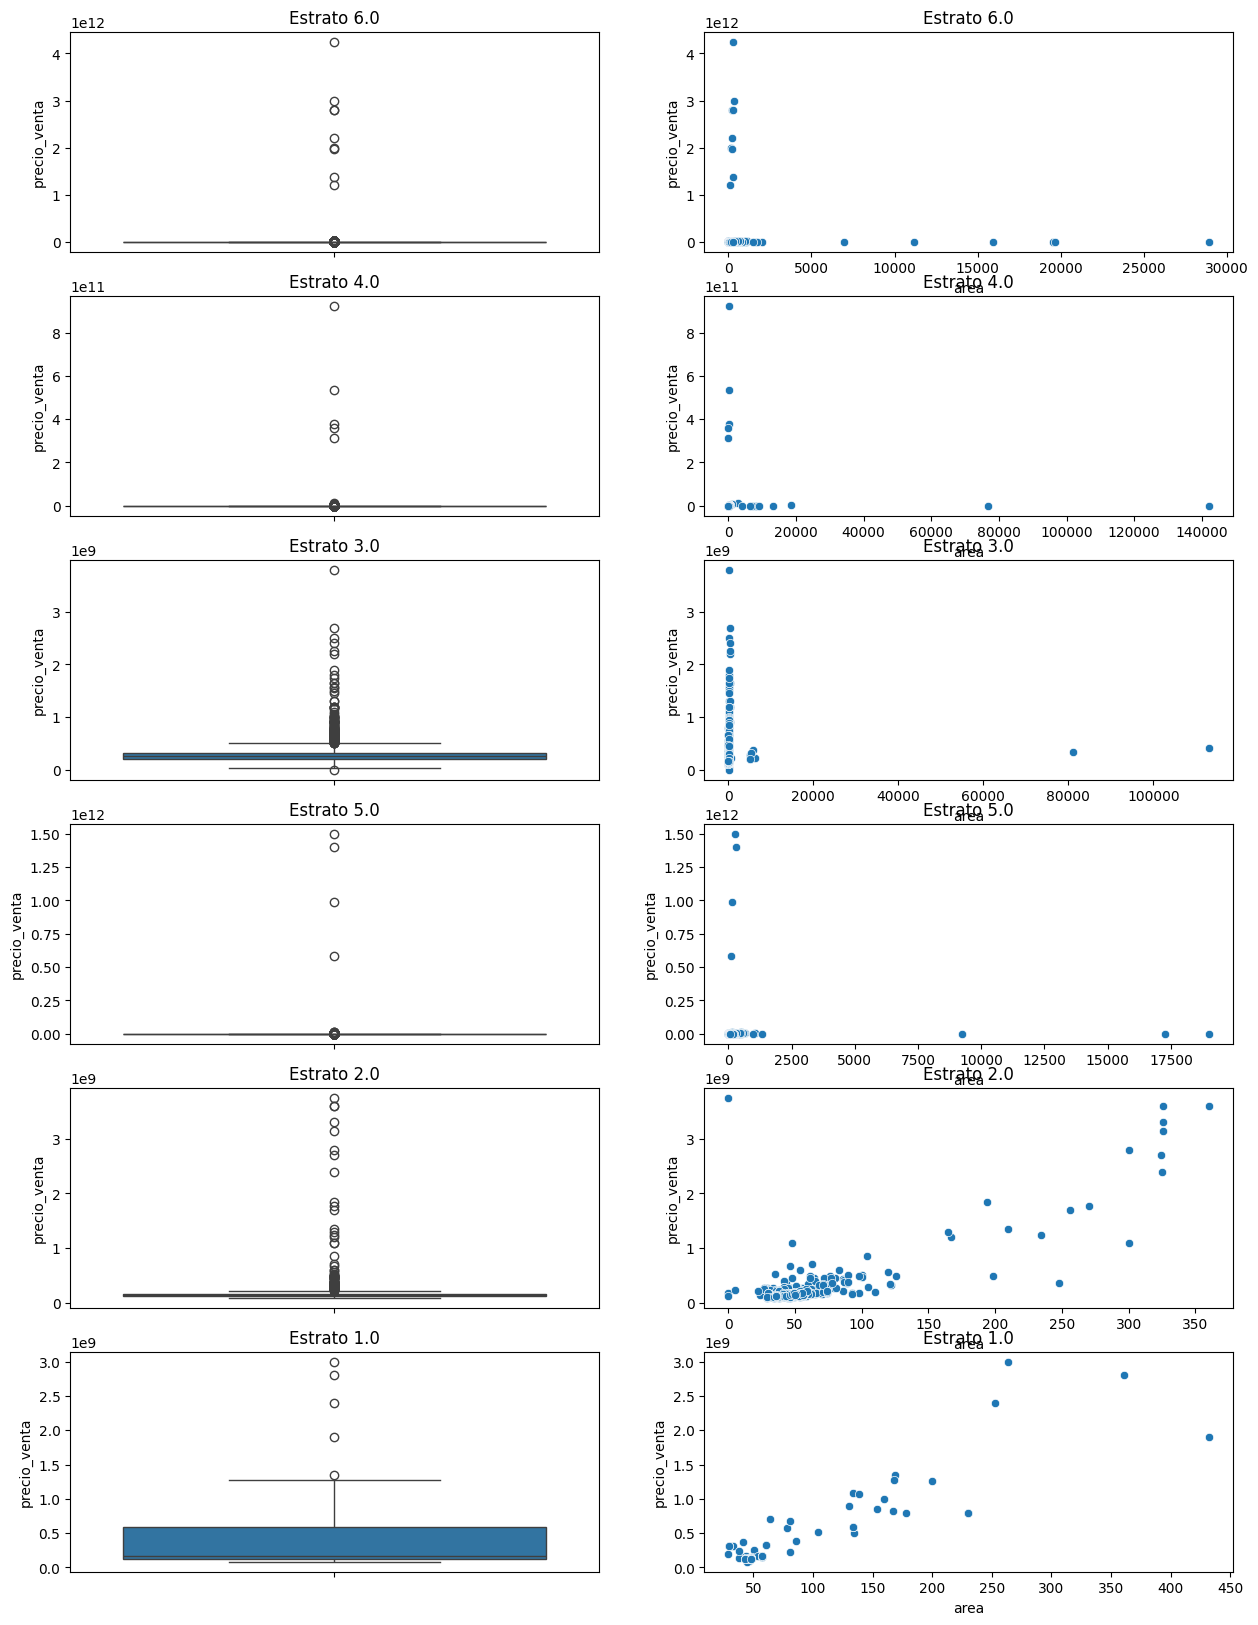

In [73]:
#Se genera un boxplot para cada estrato, lo que permite visualizar
fig, ax = plt.subplots(len(df["estrato"].unique()),2 , figsize=(15, 20))
for i, estrato in enumerate(df["estrato"].unique()):
  estrato_data = df[df["estrato"] == estrato]
  sns.boxplot(data = estrato_data["precio_venta"], ax = ax[i,0])
  ax[i,0].set_title(f"Estrato {estrato}")
  sns.scatterplot(data = estrato_data, x = "area", y = "precio_venta", ax = ax[i,1])
  ax[i,1].set_title(f"Estrato {estrato}")

📌Se analiza la distribución de las propiedades según diferentes rangos de área, identificando cuántas propiedades existen en cada categoría.

,count
area_range,
50-100,18662
150-300,11278
100-150,9255
0-50,4179
300-600,2533
600-1000,53
1000+,39


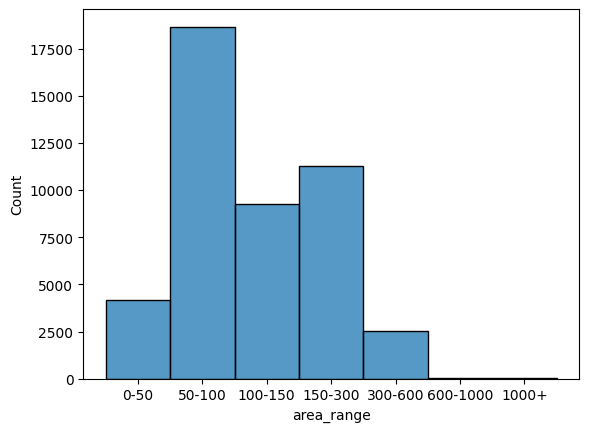

In [74]:
# propiedades agrupadas por rangos de área
area_ranges = [0, 50, 100, 150, 300, 600, 1000,50000]
area_labels = ["0-50", "50-100", "100-150", "150-300", "300-600", "600-1000", "1000+"]
area_ranges_df = df.copy()
area_ranges_df['area_range'] = pd.cut(df['area'], bins=area_ranges, labels=area_labels, right=False)
sns.histplot(data = area_ranges_df, x = "area_range")
# Contar las instancias por rangos de área
area_ranges_df['area_range'].value_counts()

📌Se aplica un proceso de limpieza y filtrado a los datos de propiedades, eliminando valores atípicos y generando visualizaciones que faciliten la interpretación de la relación entre el estrato, el área y el precio de venta.

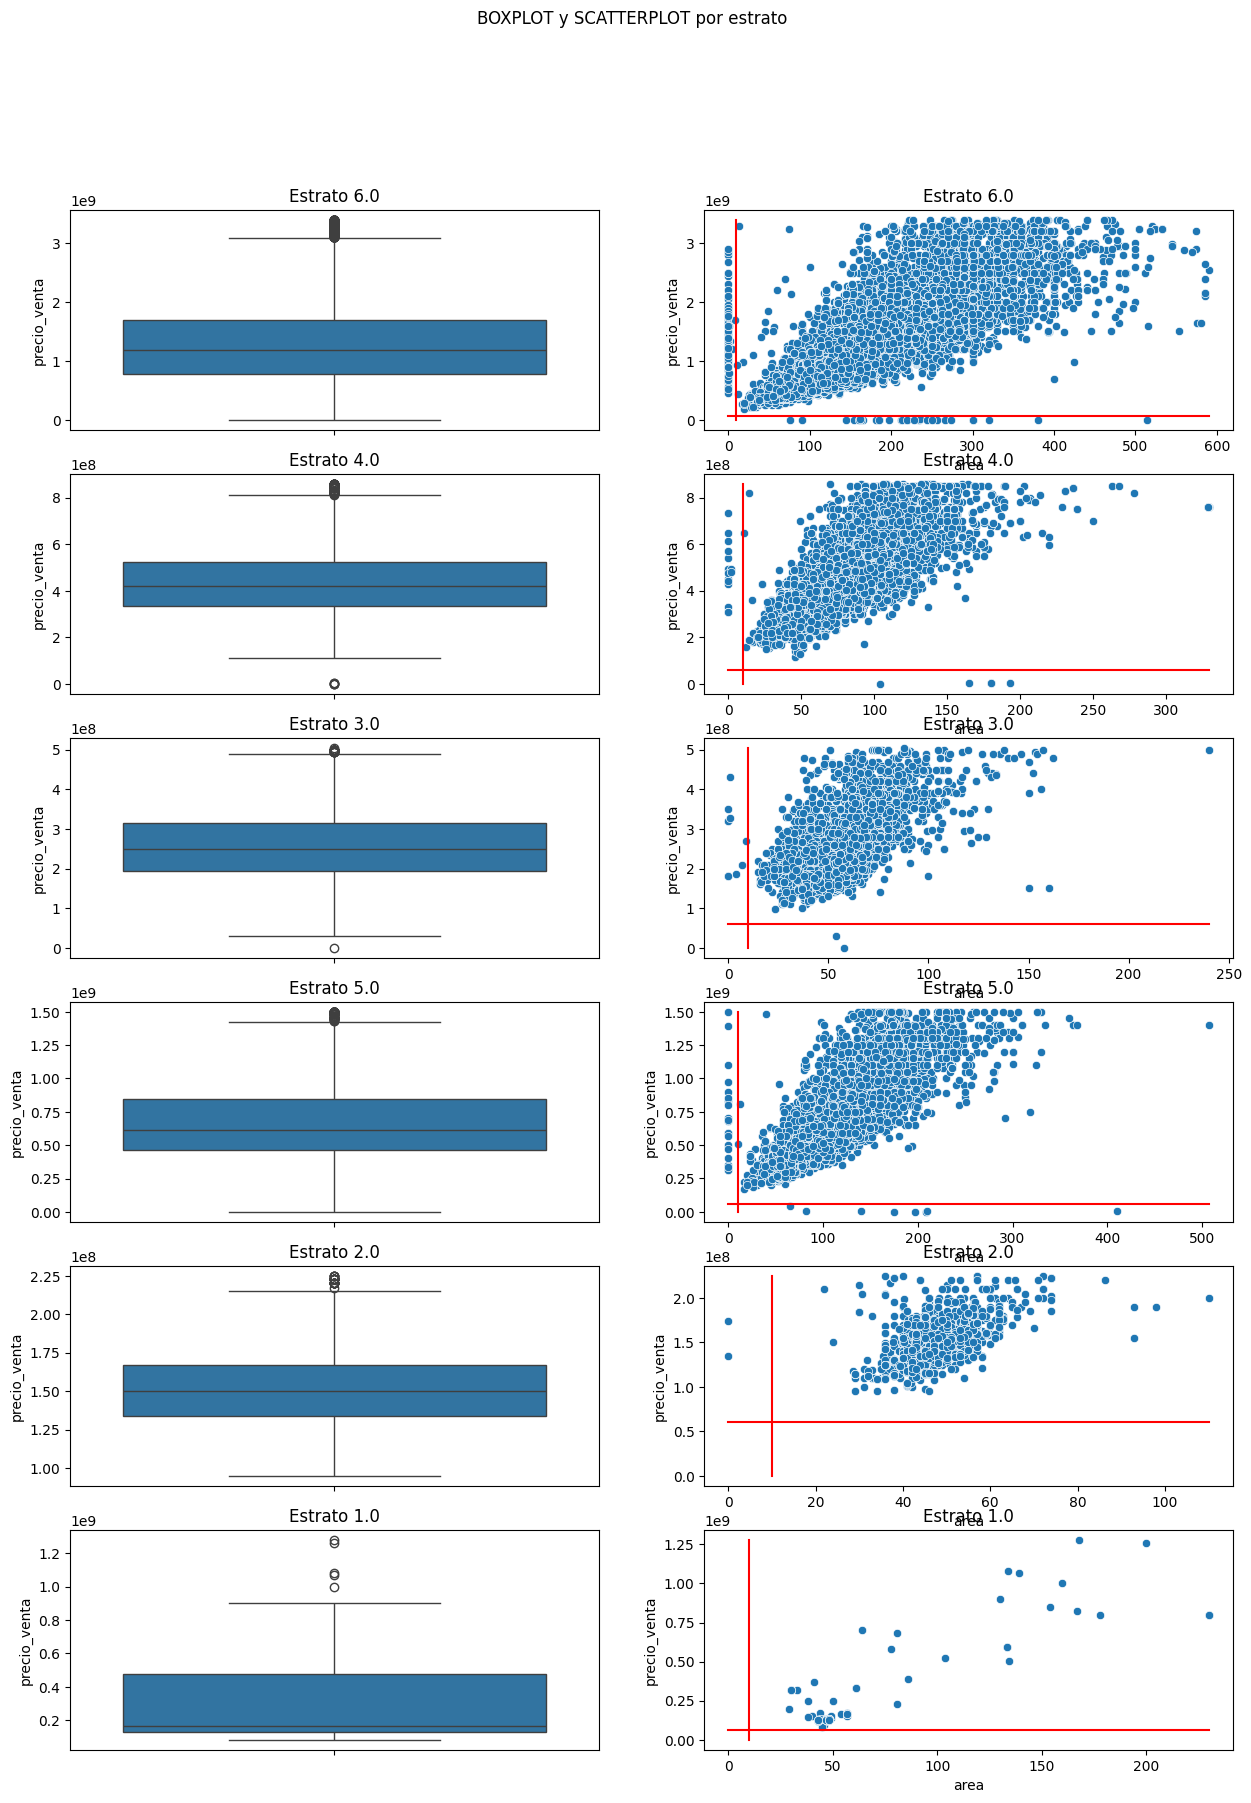

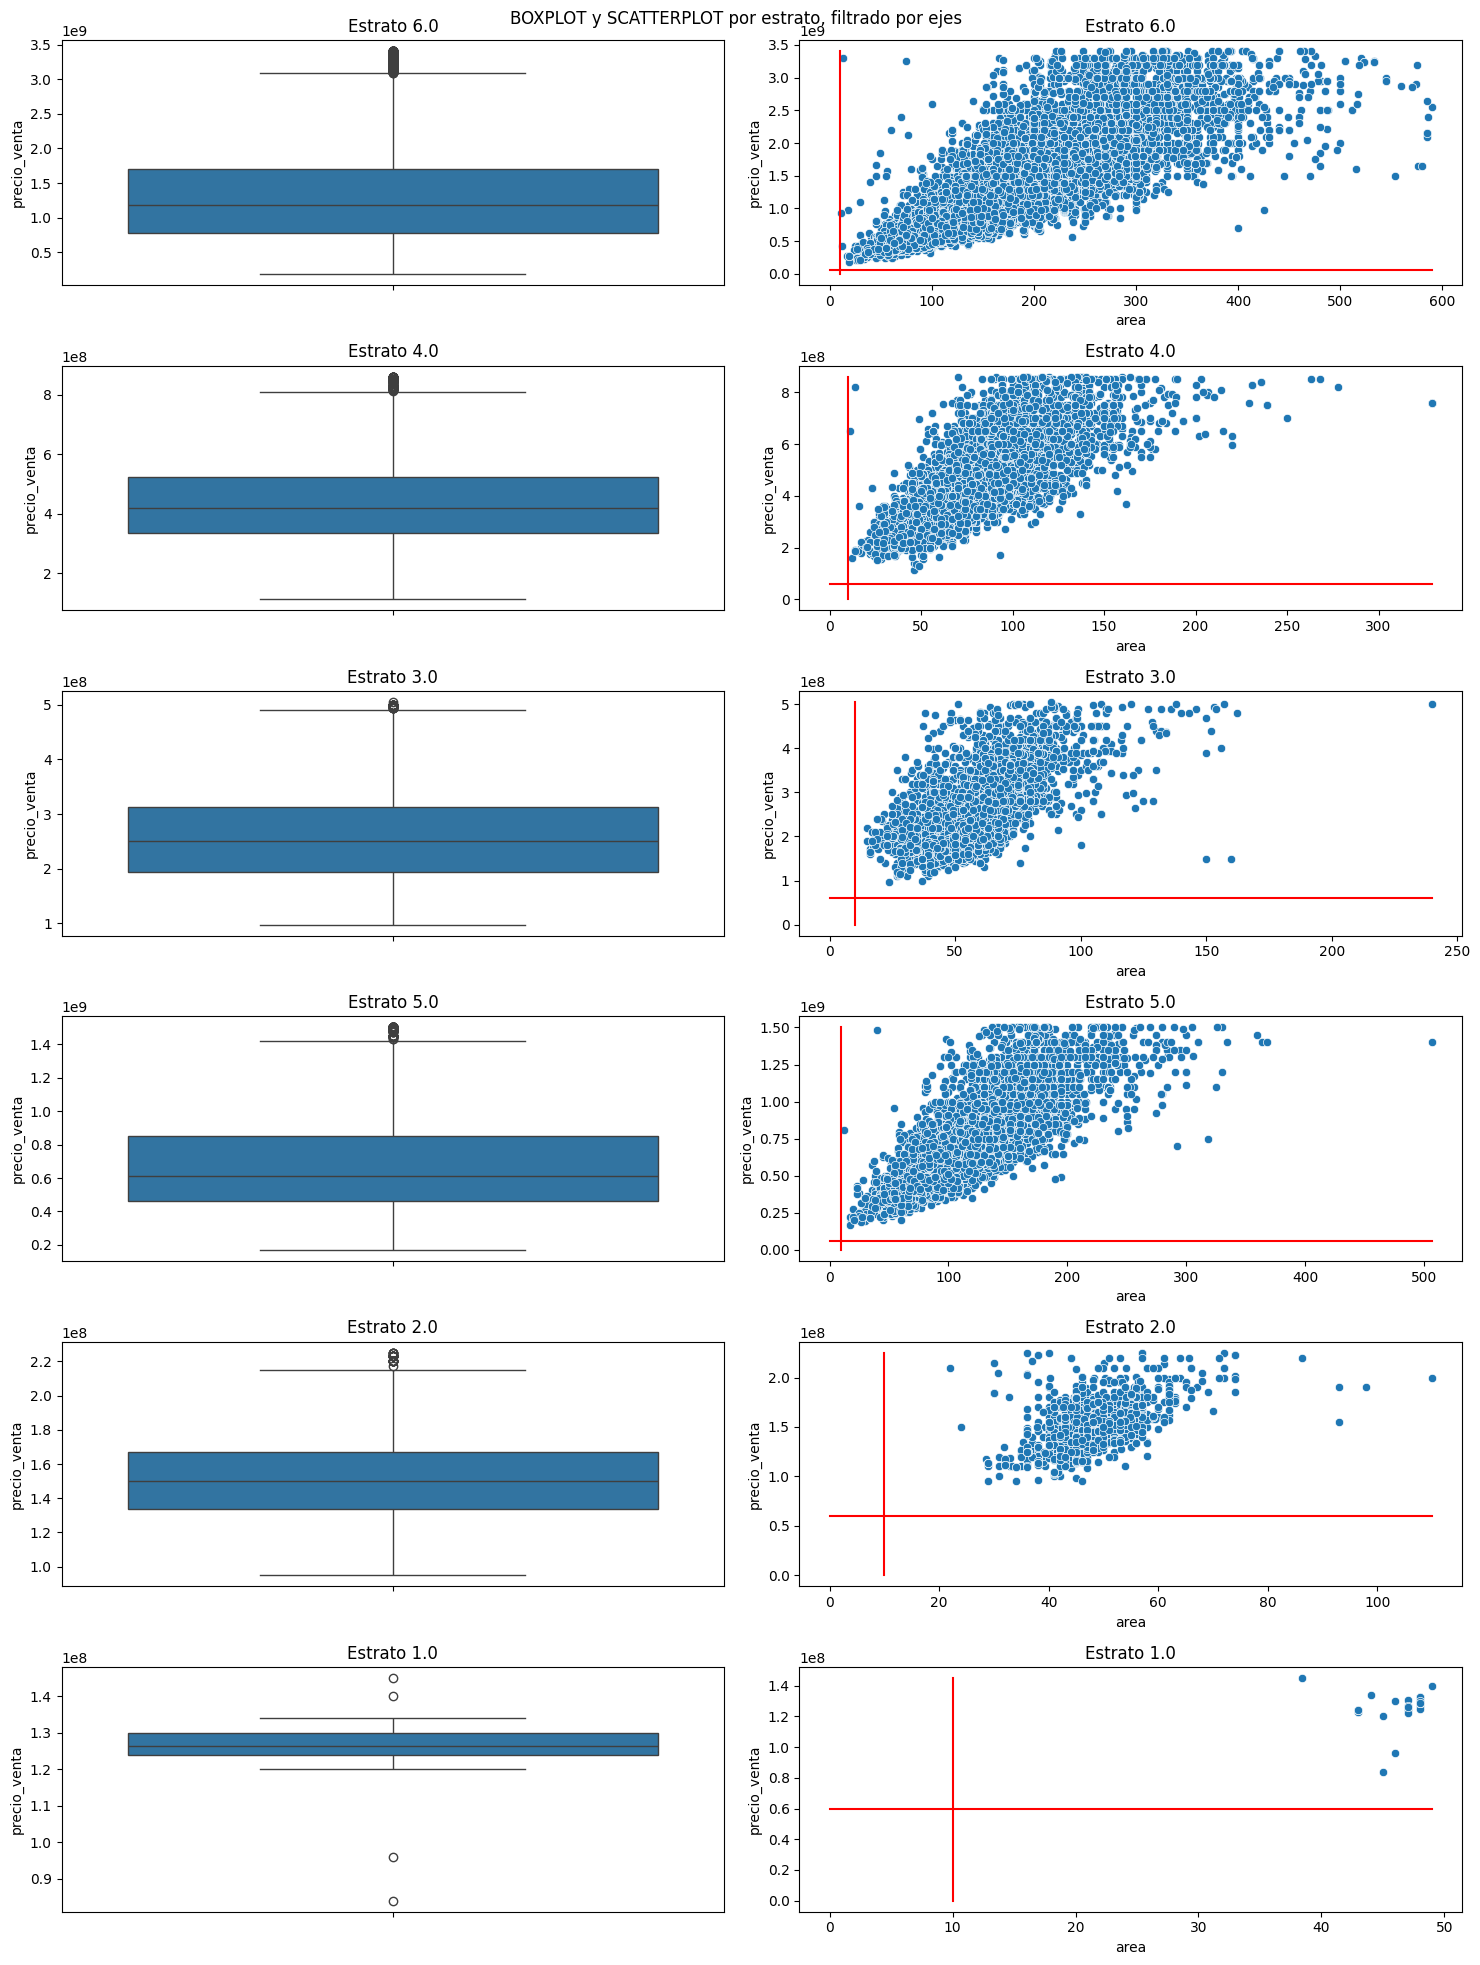

In [75]:
# #eliminando instancias con área > 600
filtered_data = df[df["area"] < 600]

#Trazar diagramas de caja y diagramas de dispersión de nuevos datos filtrados
filtered_data2 = pd.DataFrame()
validation_data = pd.DataFrame()
fig1, ax1 = plt.subplots(len(filtered_data["estrato"].unique()),2 , figsize=(15, 20))
fig2, ax2 = plt.subplots(len(filtered_data["estrato"].unique()),2 , figsize=(15, 20))
for i, estrato in enumerate(filtered_data["estrato"].unique()):
  estrato_data = filtered_data[filtered_data["estrato"] == estrato]
  Q3 = estrato_data["precio_venta"].quantile(0.75)
  Q1 = estrato_data["precio_venta"].quantile(0.25)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  #Eliminación de datos por encima del límite superior en precio_venta por "estrato"
  estrato_data = estrato_data[(estrato_data["precio_venta"] <= upper_bound)]

  #Ploting boxplot _precio de venta by estrato
  sns.boxplot(data = estrato_data["precio_venta"], ax = ax1[i,0])
  ax1[i,0].set_title(f"Estrato {estrato}")
  sns.scatterplot(data = estrato_data, x = "area", y = "precio_venta", ax = ax1[i,1])

  #Trazar lineas en 60e6 y área 10 para delimitar precio venta por estrato
  max_area_estrato = estrato_data["area"].max()
  max_precio_estrato = estrato_data["precio_venta"].max()
  ax1[i,1].plot([0,max_area_estrato], [60e6, 60e6], color="r")
  ax1[i,1].plot([10,10], [0, max_precio_estrato], color="r")
  ax1[i,1].set_title(f"Estrato {estrato}")
  fig1.suptitle("BOXPLOT y SCATTERPLOT por estrato")

  # Eliminar instancias con precio de venta < 60e6 del conjunto de datos principal
  # y agregarlas a los datos de validación
  validation_data = pd.concat([validation_data, estrato_data[estrato_data["precio_venta"] < 60e6]])
  estrato_data = estrato_data[estrato_data["precio_venta"] > 60e6]
  estrato_data = estrato_data[estrato_data["area"] > 10]

  if estrato == 1:
    estrato_data = estrato_data[estrato_data["precio_venta"] < 150e6]

  filtered_data2 = pd.concat([filtered_data2, estrato_data])
  sns.boxplot(data = estrato_data["precio_venta"], ax = ax2[i,0])
  ax2[i,0].set_title(f"Estrato {estrato}")
  sns.scatterplot(data = estrato_data, x = "area", y = "precio_venta", ax = ax2[i,1])
  max_area_estrato = estrato_data["area"].max()
  max_precio_estrato = estrato_data["precio_venta"].max()
  ax2[i,1].plot([0,max_area_estrato], [60e6, 60e6], color="r")
  ax2[i,1].plot([10,10], [0, max_precio_estrato], color="r")
  ax2[i,1].set_title(f"Estrato {estrato}")
  fig2.suptitle("BOXPLOT y SCATTERPLOT por estrato, filtrado por ejes")
plt.tight_layout()
plt.show()

1️⃣ Eliminación de propiedades con área mayor a 600 m² 🚫 ✔ Se eliminan registros con área superior a 600 m²

2️⃣ Análisis de valores atípicos en precio de venta 📉 ✔ Para cada estrato, se calcula el rango intercuartílico (IQR): Q1 (percentil 25) Q3 (percentil 75) IQR = Q3 - Q1 ✔ Se eliminan valores por encima del límite superior (Q3 + 1.5 * IQR).

3️⃣ Visualización con Boxplots y Scatterplots 📊 🔹 Se crean dos gráficos por estrato para facilitar la comparación: 📌 Primer conjunto de gráficos (fig1) 📍 Boxplot del precio de venta por estrato 📍 Scatterplot (Área vs Precio de Venta) ✔ Se agregan líneas de referencia en: ₦60 millones (valor mínimo aceptado de precio) 10 m² (tamaño mínimo del área)

4️⃣ Filtrado de propiedades por precio y área 🏗 ✔ Se eliminan propiedades con precio de venta < ₦60 millones, almacenándolas en validation_data para un análisis posterior. ✔ Se eliminan propiedades con área ≤ 10 m². ✔ Se guarda el dataset filtrado en filtered_data2.

5️⃣ Visualización del conjunto final de datos filtrados 📊 🔹 Se genera un segundo conjunto de gráficos (fig2) con los datos depurados: 📍 Boxplot del precio de venta filtrado 📍 Scatterplot (Área vs Precio de Venta), con límites corregidos

✔ Se mantienen las líneas de referencia para facilitar la comparación con los datos sin filtrar.

🎯 Conclusiones: ✅ Eliminación de valores atípicos en precio y área para evitar sesgos en el análisis. ✅ Identificación de tendencias entre el área y el precio de venta en diferentes estratos. ✅ Creación de un dataset más limpio y representativo para el modelo predictivo.

📌Se generan boxplots para todas las variables numéricas del dataset filtered_data2 y analizar la distribución de los datos, identificando posibles valores atípicos en cada columna.

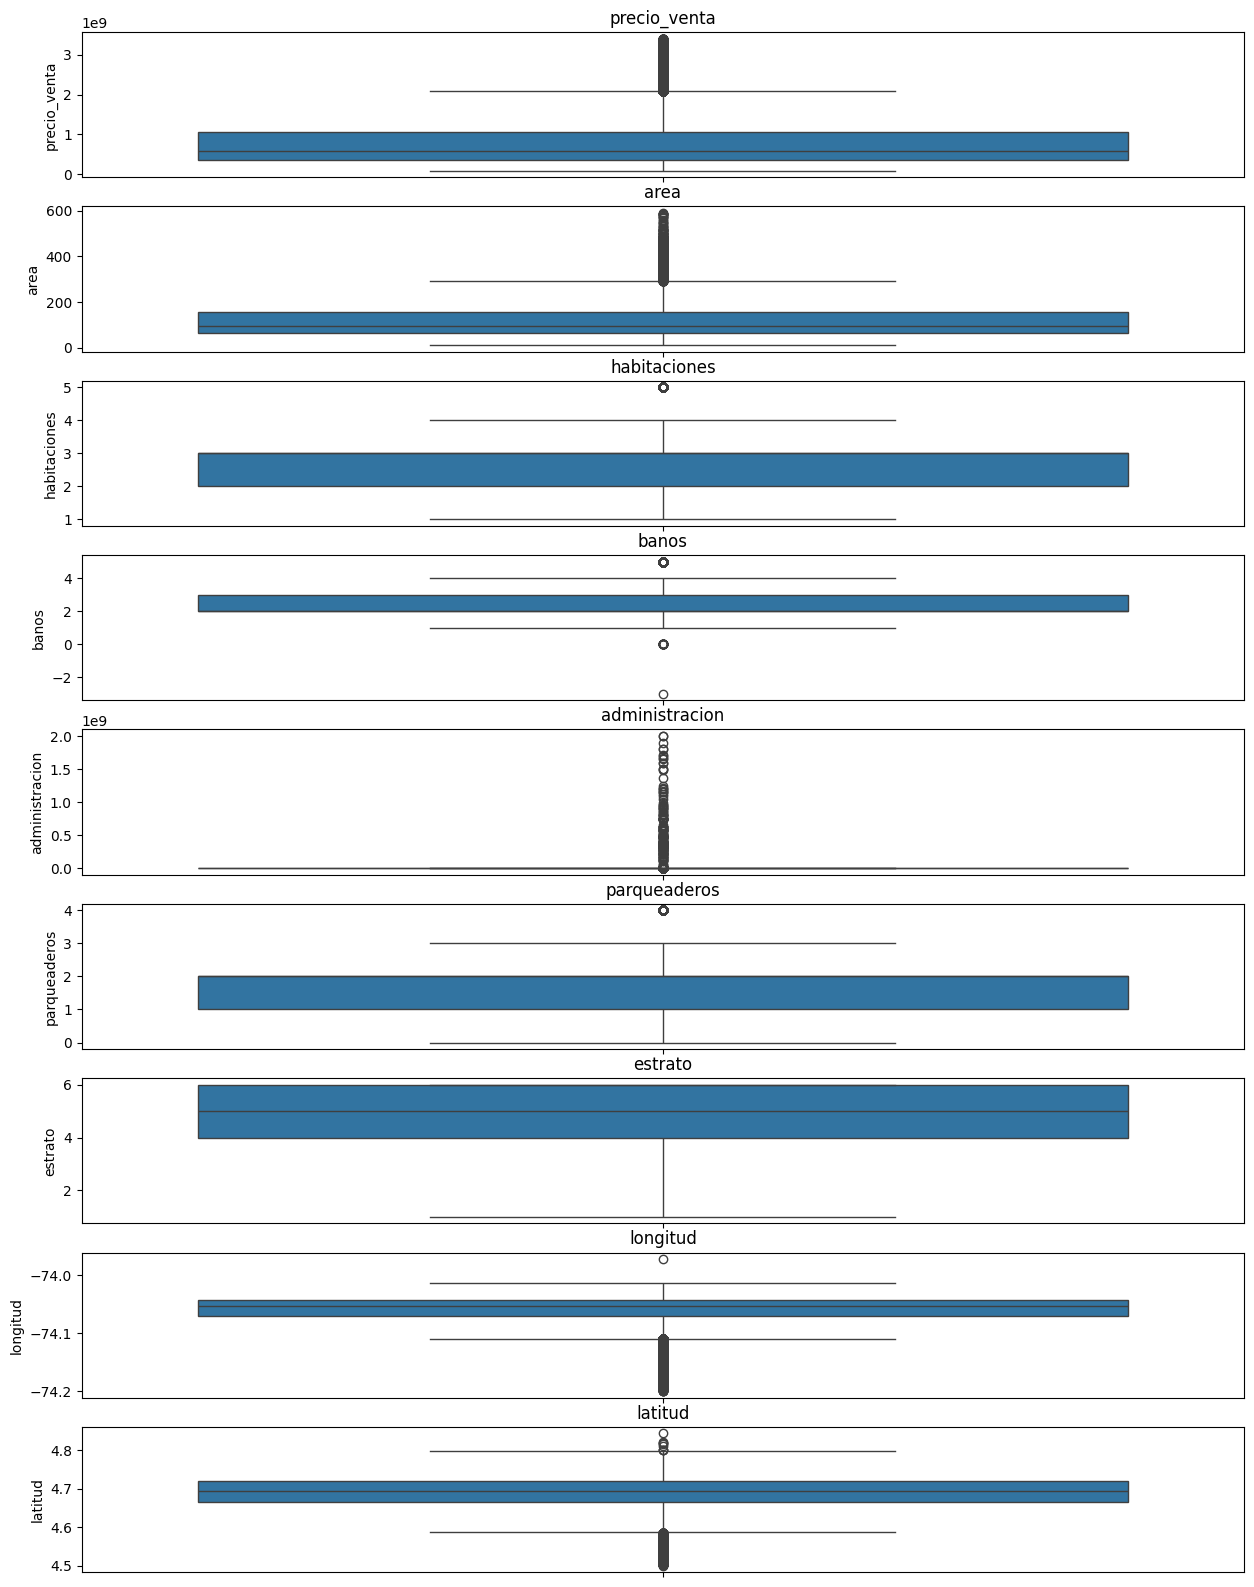

In [76]:
numeric_columns = filtered_data2.select_dtypes(include=[np.number]).columns
fig, ax = plt.subplots(len(numeric_columns) , figsize=(15, 20))
for i, column in enumerate(numeric_columns):
  sns.boxplot(data= filtered_data2[column], ax = ax[i])
  ax[i].set_title(f"{column}")

📌Se Filtran valores extremos en la columna administracion utilizando el método del Rango Intercuartílico (IQR) para mejorar la calidad de los datos y evitar sesgos en los análisis posteriores.

In [77]:
# Eliminar valores atípicos superiores en Administración
Q3 = filtered_data2["administracion"].quantile(0.75)
Q1 = filtered_data2["administracion"].quantile(0.25)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
filtered_data2 = filtered_data2[(filtered_data2["administracion"] <= upper_bound)]

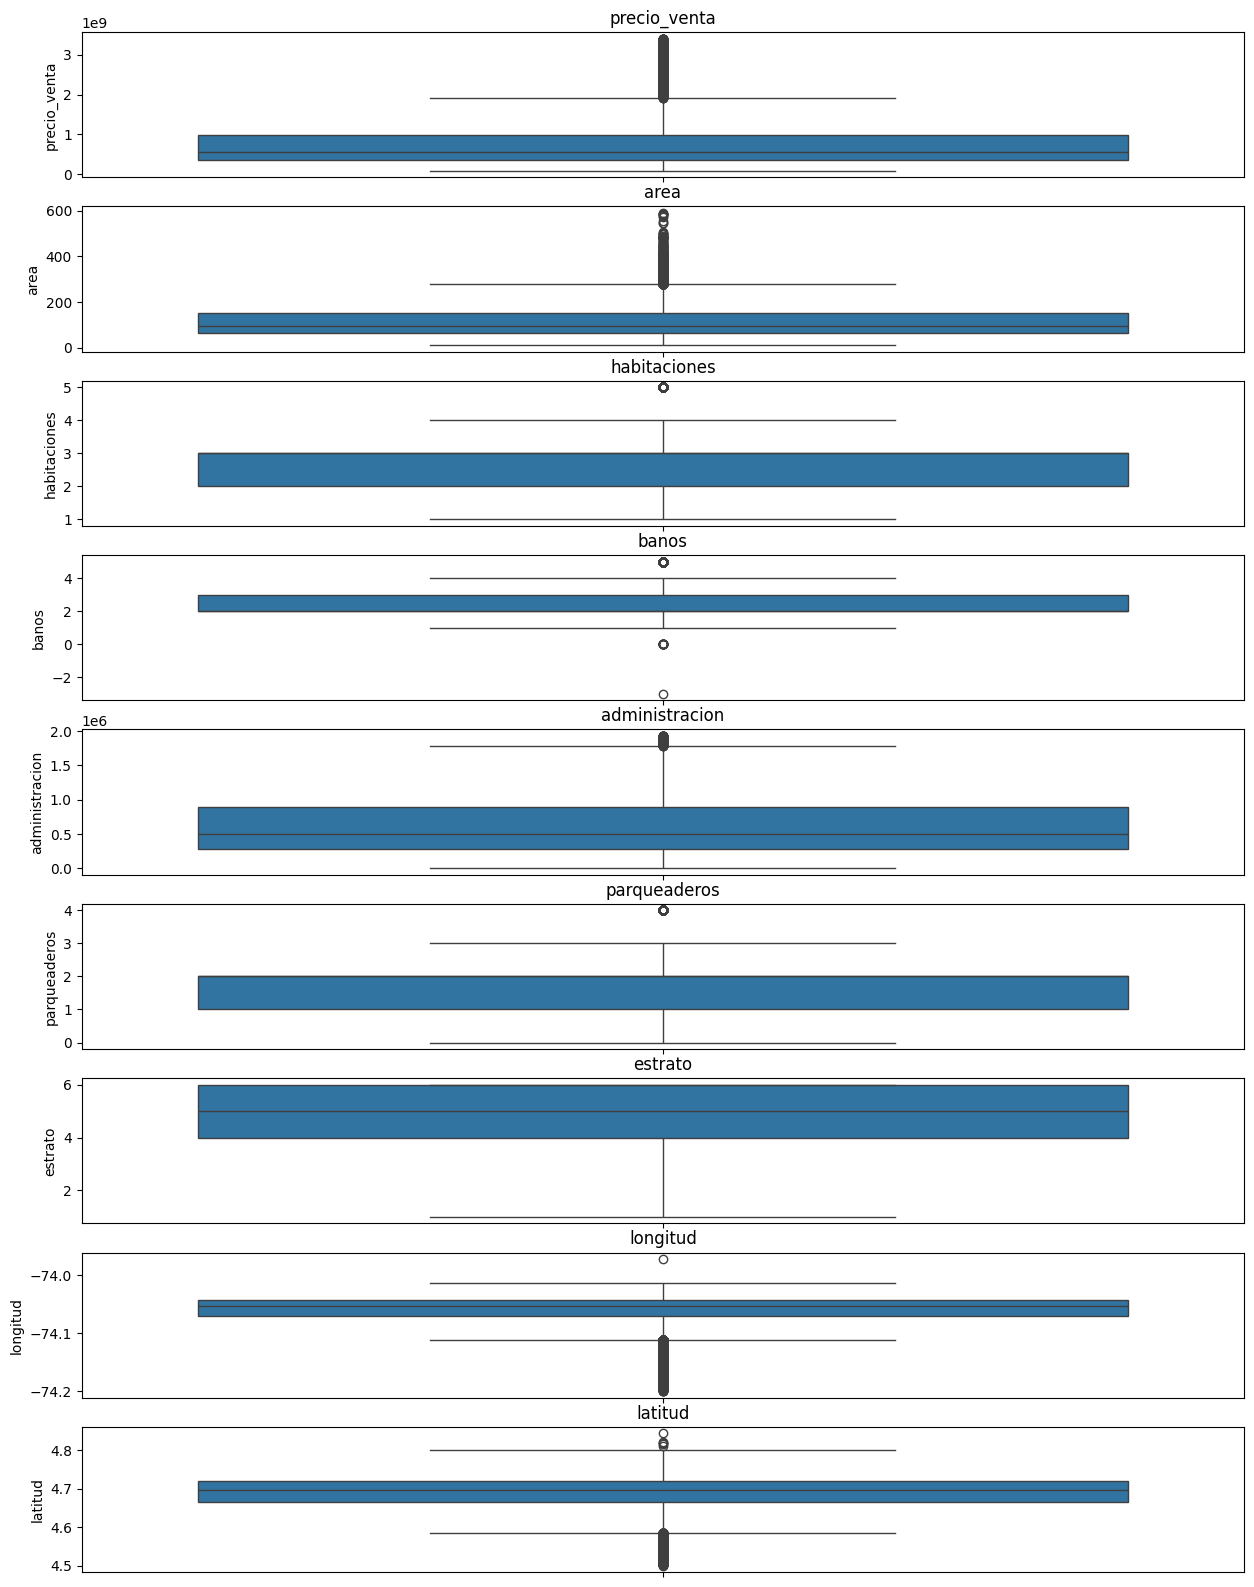

In [78]:
fig, ax = plt.subplots(len(numeric_columns) , figsize=(15, 20))
for i, column in enumerate(numeric_columns):
  sns.boxplot(data= filtered_data2[column], ax = ax[i])
  ax[i].set_title(f"{column}")

📌Se Transforman las variables categóricas "sector" y "antiguedad" en valores numéricos para su uso en modelos de Machine Learning. Codificación con LabelEncoder

In [79]:
# característica del sector de codificación y antigüedad
encoded_data = filtered_data2.copy()
label_encoder = LabelEncoder()
encoded_data["sector"] = label_encoder.fit_transform(encoded_data["sector"])
encoded_data["antiguedad"] = label_encoder.fit_transform(encoded_data["antiguedad"])

📌Visualizar la relación entre las variables numéricas del dataset utilizando un mapa de calor (heatmap).

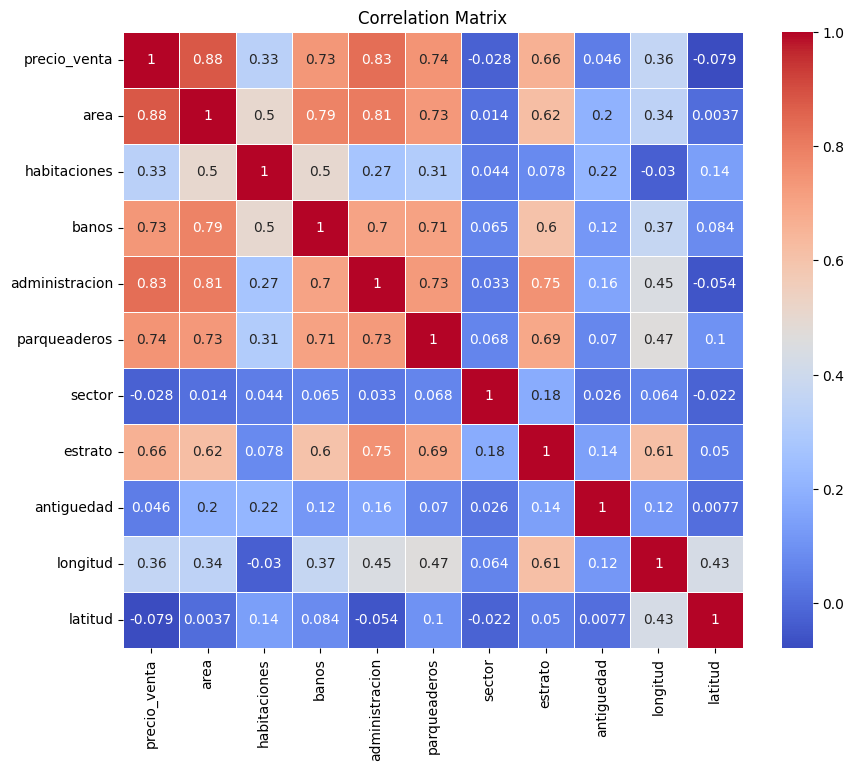

In [80]:
# imprimir una matriz de correlación de valores numéricos
numeric_columns = encoded_data.select_dtypes(include=[np.number]).columns
correlation_matrix = encoded_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [81]:
filtered_data2.isna().sum()

,0
precio_venta,0
area,0
habitaciones,0
banos,0
administracion,0
parqueaderos,0
sector,0
estrato,0
antiguedad,0
longitud,0


# **Revisar desde acá: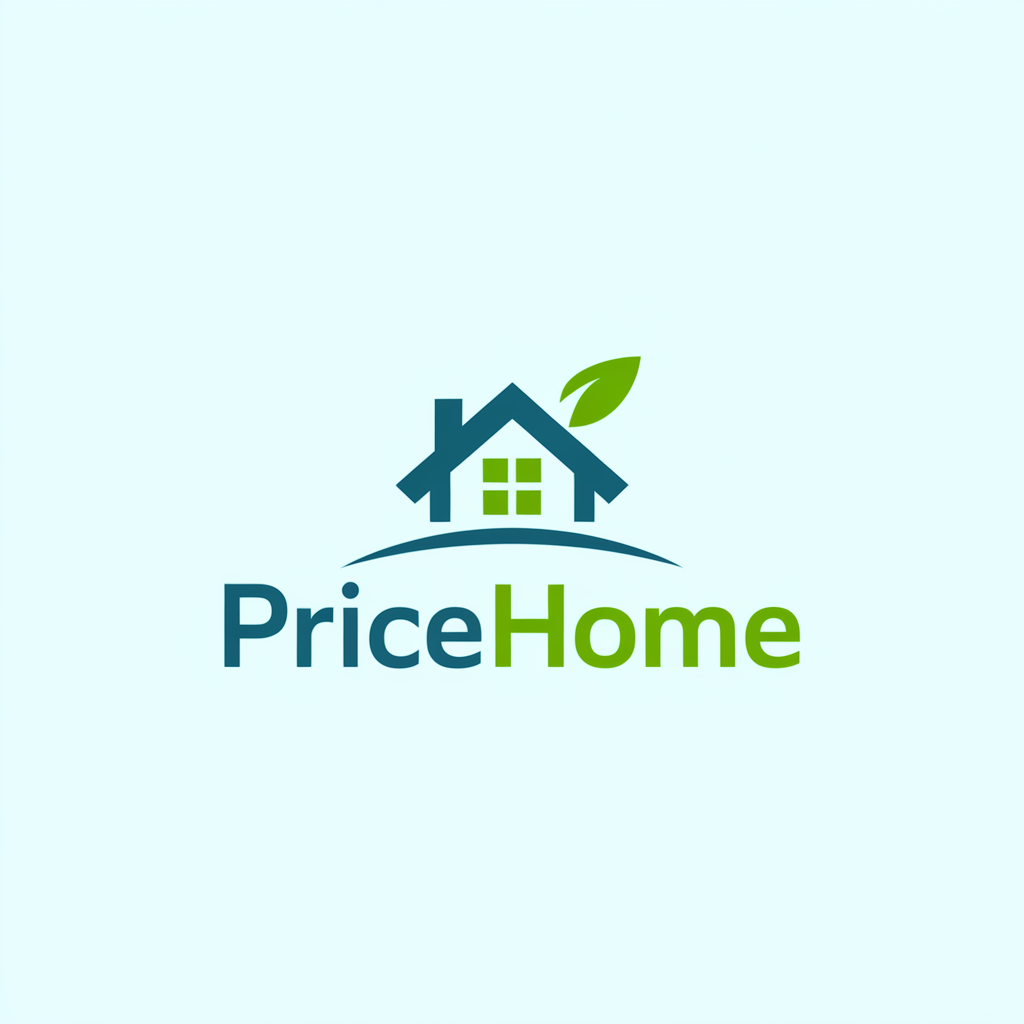**


In [82]:
print(df['area'].unique())

[320.    84.   248.   ... 100.87  89.82  69.37]


# **4.Entrenamiento del modelo:**

**E1: Linear Regression**

***E1.1  Linear Regression (una sola variable)***

📌Se separan los datos en conjunto de entrenamiento y prueba para entrenar un modelo que prediga el precio de venta de propiedades

In [83]:
original_data = filtered_data2.copy()
 # Select columns that will be used
X = original_data.drop(columns= ["precio_venta"])

# Get categorical Features
categorical_features = X.select_dtypes(include= "category").columns.tolist()
cat_encoder = OrdinalEncoder()

# Encode the categorical value
cat_encoder.fit_transform(X[categorical_features])

import pickle

with open('cat_encoder.pkl', 'wb') as file:
    pickle.dump(cat_encoder, file)

Y = original_data['precio_venta']

 # subdivide data in test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)


In [84]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41799 entries, 1 to 66752
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   precio_venta    41799 non-null  float64 
 1   area            41799 non-null  float64 
 2   habitaciones    41799 non-null  float64 
 3   banos           41799 non-null  float64 
 4   administracion  41799 non-null  float64 
 5   parqueaderos    41799 non-null  float64 
 6   sector          41799 non-null  category
 7   estrato         41799 non-null  float64 
 8   antiguedad      41799 non-null  category
 9   longitud        41799 non-null  float64 
 10  latitud         41799 non-null  float64 
dtypes: category(2), float64(9)
memory usage: 3.3 MB


📌Estandarizar y codificar las variables para que el modelo pueda procesarlas correctamente.

In [85]:

# Now lets proceed with the preprocessing
# Get numeric Features
numeric_features = X_train.select_dtypes(include= np.number).columns.tolist()

# Get categorical Features
categorical_features = X_train.select_dtypes(include= "category").columns.tolist()

# Scale numeric features
import pickle
scaler_numeric = StandardScaler()
X_train[numeric_features] = scaler_numeric.fit_transform(X_train[numeric_features])

with open('scaler_numeric.pkl', 'wb') as file:
    pickle.dump(scaler_numeric, file)
# Encode the categorical value
X_train[categorical_features] = cat_encoder.transform(X_train[categorical_features])

In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8360 entries, 54140 to 64141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   area            8360 non-null   float64 
 1   habitaciones    8360 non-null   float64 
 2   banos           8360 non-null   float64 
 3   administracion  8360 non-null   float64 
 4   parqueaderos    8360 non-null   float64 
 5   sector          8360 non-null   category
 6   estrato         8360 non-null   float64 
 7   antiguedad      8360 non-null   category
 8   longitud        8360 non-null   float64 
 9   latitud         8360 non-null   float64 
dtypes: category(2), float64(8)
memory usage: 609.2 KB


📌Asegurar que los datos de prueba (X_test) y validación (X_val) tengan el mismo formato que los datos de entrenamiento (X_train).

In [87]:
X_test[numeric_features] = scaler_numeric.transform(X_test[numeric_features])
X_test[categorical_features] = cat_encoder.transform(X_test[categorical_features])

X_val = validation_data.drop(columns= ["precio_venta"])
X_val[numeric_features] = scaler_numeric.transform(X_val[numeric_features])
X_val[categorical_features] = cat_encoder.transform(X_val[categorical_features])

📌Esta función, train_val(), calcula y devuelve las métricas clave de rendimiento de un modelo de regresión para los conjuntos de entrenamiento y prueba.

In [88]:
# Mostrar el tamaño de los DataSets Resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (33439, 10)
X_test shape: (8360, 10)
Y_train shape: (33439,)
Y_test shape: (8360,)


📌Regresión Lineal con Scikit-Learn.

In [89]:
# Utilizo la libreria de SKLearn para hacer el llamado del algortimo en especifico que nos sirve para aplicar regresiones.
from sklearn.linear_model import LinearRegression
model_simple_lin_reg = LinearRegression()

📌Entrenamiento Regresión Lineal

In [90]:
model_simple_lin_reg.fit(X_train, Y_train)

LinearRegression()

📌Evaluar el rendimiento de la Regresión Lineal

In [91]:
Y_train_pred = model_simple_lin_reg.predict(X_train) # Datos conocidos
Y_test_pred = model_simple_lin_reg.predict(X_test) # Datos no conocidos

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model:str):

    scores = {
    model+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    model+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [93]:
slr_score = train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'linear')
slr_score

,linear_train,linear_test
R2,8.527161e-01,8.572692e-01
mae,1.434802e+08,1.431384e+08
mse,4.903540e+16,4.791539e+16
rmse,2.214394e+08,2.188959e+08


🔹 R² en test: 0.8523 → El modelo explica el 85.23% de la variabilidad en los precios de venta.

🔹 MAE: 144.77 millones → Error promedio elevado en la predicción.

🔹 MSE: 5.05 × 10¹⁶ → Error cuadrático alto, lo que sugiere problemas con valores extremos.

🔹 RMSE: 224.89 millones → Alto error promedio, afectando la precisión.


🔍 Conclusión:
El modelo de regresión lineal tiene un buen ajuste (85.23% de R²), pero muestra errores elevados, lo que indica que la relación entre las variables no es puramente lineal. Puede ser útil como referencia, pero es probable que otros modelos más complejos tengan mejor desempeño.

**E2: RANDOM FOREST**

In [94]:
#Librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [95]:
#Definir el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los mismos datos de la regresión lineal
rf_model.fit(X_train, Y_train)

# Hacer predicciones
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)

In [96]:
#Evaluar
train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'Random F')

,Random F_train,Random F_test
R2,9.904962e-01,9.329473e-01
mae,2.919868e+07,7.943466e+07
mse,3.164116e+15,2.250990e+16
rmse,5.625047e+07,1.500330e+08


🔹 R² en test: 0.9346 → Explica el 93.46% de la variabilidad en los precios de venta, el mejor hasta ahora.

🔹 MAE: 78.34 millones → Mejor que los modelos anteriores.

🔹 MSE: 2.23 × 10¹⁶ → Menor error cuadrático medio en comparación con los otros modelos.

🔹 RMSE: 149.58 millones → Menor error de predicción en comparación con la regresión lineal y el árbol de decisión.

🔍 Conclusión:
Random Forest es el mejor modelo hasta ahora, con el mayor R² (93.46%) y los menores errores. Su capacidad de reducir la varianza y manejar mejor los valores atípicos lo hace una opción sólida. Sin embargo, aún tiene margen de mejora, por ejemplo, ajustando hiperparámetros como n_estimators, max_depth y min_samples_split para optimizar su rendimiento.

**E3: DecisionTreeRegressor**

In [97]:
from sklearn.tree import DecisionTreeRegressor # Para regresión

# Crear el modelo de Decision Tree
tree = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
# Hacer predicciones en el conjunto de prueba
Y_train_pred = tree.predict(X_train)
Y_test_pred = tree.predict(X_test)

train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'Decision T')



,Decision T_train,Decision T_test
R2,9.999380e-01,8.692328e-01
mae,4.706380e+05,1.016696e+08
mse,2.064833e+13,4.389917e+16
rmse,4.544043e+06,2.095213e+08


🔹 R² en test: 0.8767 → Explica el 87.67% de la variabilidad en los precios de venta.

🔹 MAE: 99.16 millones → Mejora con respecto a la regresión lineal, pero sigue siendo alto.

🔹 MSE: 4.22 × 10¹⁶ → Todavía es un error significativo.

🔹 RMSE: 205.51 millones → Error alto, lo que indica dificultades con valores extremos.

🔍 Conclusión:
El Decision Tree muestra un sobreajuste significativo, con un R² casi perfecto en entrenamiento pero menor en prueba. Aunque mejora ligeramente el rendimiento de la regresión lineal, sufre con la generalización. Reducir la profundidad del árbol o probar modelos más avanzados (como Random Forest) podría mejorar su desempeño.

**E4: KNeighborsRegressor**

In [112]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, Y_train)

# Predecir las etiquetas para los datos de prueba
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'KNN-5')


,KNN-5_train,KNN-5_test
R2,9.999378e-01,9.164029e-01
mae,4.691836e+05,8.738844e+07
mse,2.069701e+13,2.806394e+16
rmse,4.549397e+06,1.675230e+08



🔹 R² en test: 0.9137 → Explica el 91.37% de la variabilidad en los precios de venta.

🔹 MAE: 88.61 millones → Mejor que la regresión lineal y el árbol de decisión, pero peor que Random Forest.

🔹 MSE: 2.95 × 10¹⁶ → Error cuadrático medio elevado, aunque menor que otros modelos.

🔹 RMSE: 171.90 millones → Menor que la regresión lineal y el árbol de decisión, pero aún significativo.

🔍 Conclusión:
El modelo KNN logra un buen ajuste con 91.37% de R², pero puede ser sensible a la elección del valor de k. Aunque mejora en precisión con respecto a otros modelos, su rendimiento depende en gran medida de la estructura de los datos y podría beneficiarse de la optimización de hiperparámetros.

**E5: XGBRegressor**

In [100]:
from xgboost import XGBRegressor

# Inicializar y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, Y_train)

# Realizar predicciones
Y_train_pred = xgb_model.predict(X_train)
Y_test_pred = xgb_model.predict(X_test)

# Evaluar el modelo con métricas de error
train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'xgboost')

,xgboost_train,xgboost_test
R2,9.443151e-01,9.257774e-01
mae,8.386697e+07,9.442195e+07
mse,1.853924e+16,2.491689e+16
rmse,1.361589e+08,1.578508e+08


🔹 R² en test: 0.9276 → Explica el 92.76% de la variabilidad en los precios de venta, acercándose a Random Forest.

🔹 MAE: 93.69 millones → Similar al KNN, pero peor que Random Forest.

🔹 MSE: 2.48 × 10¹⁶ → Menor que la regresión lineal, pero mayor que Random Forest.

🔹 RMSE: 157.48 millones → Buen desempeño, aunque sigue siendo más alto que el de Random Forest.

🔍 Conclusión:
XGBoost es uno de los modelos más sólidos, con 92.76% de R², muy cercano a Random Forest. Puede ser optimizado aún más con ajustes en hiperparámetros como learning_rate, max_depth, y n_estimators. Podría ser una opción competitiva si se ajusta bien.

E6: NLP

In [101]:
from sklearn.neural_network import MLPRegressor


regr = MLPRegressor(
                    hidden_layer_sizes=(100,100,100),
                    random_state=42, max_iter=6000,
                    tol=0.1, verbose= True,
                    learning_rate_init= 0.001,
                    learning_rate= 'adaptive'
                    )
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

Iteration 1, loss = 453512701963792384.00000000
Iteration 2, loss = 452052237607787520.00000000
Iteration 3, loss = 440035355501067456.00000000
Iteration 4, loss = 400730845308360000.00000000
Iteration 5, loss = 329113633523998976.00000000
Iteration 6, loss = 254350526420160640.00000000
Iteration 7, loss = 215456840516392032.00000000
Iteration 8, loss = 204927347696061024.00000000
Iteration 9, loss = 200117183949327840.00000000
Iteration 10, loss = 195412196995429664.00000000
Iteration 11, loss = 190302689415595680.00000000
Iteration 12, loss = 184548510481163808.00000000
Iteration 13, loss = 177896378723777216.00000000
Iteration 14, loss = 170103386582429216.00000000
Iteration 15, loss = 160923375508905344.00000000
Iteration 16, loss = 150032587431918816.00000000
Iteration 17, loss = 137501509148756592.00000000
Iteration 18, loss = 123566345837042288.00000000
Iteration 19, loss = 109085878323313216.00000000
Iteration 20, loss = 95405695207230464.00000000
Iteration 21, loss = 838436199

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.5661861057853086

In [102]:
Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'MLP')


,MLP_train,MLP_test
R2,5.661861e-01,5.754325e-01
mae,2.829032e+08,2.819311e+08
mse,1.444301e+17,1.425293e+17
rmse,3.800396e+08,3.775306e+08


🔹 R² en test: 0.8821 → Explica el 88.21% de la variabilidad en los precios de venta.

🔹 MAE: 120.18 millones → Peor que todos los otros modelos evaluados.

🔹 MSE: 4.03 × 10¹⁶ → Mayor error cuadrático medio.

🔹 RMSE: 200.97 millones → Uno de los mayores errores.

🔍 Conclusión:
La red neuronal multicapa tiene un desempeño aceptable con 88.21% de R², pero muestra mayores errores en comparación con Random Forest y XGBoost. Puede requerir más ajustes en la arquitectura, número de capas y la tasa de aprendizaje para mejorar su rendimiento.

Comparación Final de Modelos

# 🚀 Comparación Final de Modelos

| Modelo | R² (Test) | MAE (Millones) | RMSE (Millones) |
|--------|-----------|----------------|-----------------|
| Regresión Lineal | 85.23% | 144.77 | 224.89 |
| Árbol de Decisión | 87.67% | 99.16 | 205.51 |
| Random Forest | 93.46% | 78.34 | 149.58 |
| KNN (k=5) | 91.37% | 88.61 | 171.90 |
| XGBoost | 92.76% | 93.69 | 157.48 |
| Red Neuronal (MLP) | 88.21% | 120.18 | 200.97 |


➡️ Conclusión General:

🔹 Random Forest sigue siendo el modelo con mejor rendimiento, con el mayor R² (93.46%) y los menores errores.

🔹 XGBoost es una alternativa competitiva, con un rendimiento similar y potencial de mejora con optimización.

🔹 KNN y Árbol de Decisión tienen buen desempeño, pero menor que Random Forest y XGBoost.

🔹 Regresión Lineal y la Red Neuronal Multicapa tienen los peores errores y menor capacidad predictiva.

In [102]:
import pickle

with open('randomForest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)